# Data processing steps

1. Remove columns that contain "Call" data, I'm not sure what they are but they doesn't seem useful
2. Transpose the dataframe so that each row is a patient and each column is a gene
3. Remove gene description and set the gene accession numbers as the column headers
4. Merge the data (expression values) with the class labels (patient numbers)

In [1]:
import itertools
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import scipy

C:\Users\student\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
testfile='data_set_ALL_AML_independent.csv'
trainfile='data_set_ALL_AML_train.csv'
patient_cancer='actual.csv'

train = pd.read_csv(trainfile)
test = pd.read_csv(testfile)
patient_cancer = pd.read_csv(patient_cancer)

In [3]:
train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [4]:
# Remove "call" columns from training a test dataframes
train_keepers = [col for col in train.columns if "call" not in col]
test_keepers = [col for col in test.columns if "call" not in col]

train = train[train_keepers]
test = test[test_keepers]


In [5]:
train.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [6]:
# Transpose the columns and rows so that genes become features and rows become observations
train = train.T
test = test.T
train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [7]:
# Clean up the column names for training data
train.columns = train.iloc[1]
train = train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for training data
test.columns = test.iloc[1]
test = test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


### Combine the data (gene expression) with class labels (patient numbers)

In [8]:
# Reset the index. The indexes of two dataframes need to be the same before you combine them
train = train.reset_index(drop=True)

# Subset the first 38 patient's cancer types
pc_train = patient_cancer[patient_cancer.patient <= 38].reset_index(drop=True)

# Combine dataframes for first 38 patients: Patient number + cancer type + gene expression values
train = pd.concat([pc_train,train], axis=1)


# Handle the test data for patients 38 through 72
# Clean up the index
test = test.reset_index(drop=True)

# Subset the last patient's cancer types to test
pc_test = patient_cancer[patient_cancer.patient > 38].reset_index(drop=True)

# Combine dataframes for last patients: Patient number + cancer type + gene expression values
test = pd.concat([pc_test,test], axis=1)


# EDA
---

There's a bunch of data, so to speed things up I'm only using a small sample of the training data for the EDA.


In [9]:
sample = train.iloc[:,2:].sample(n=100, axis=1)
sample["cancer"] = train.cancer
sample.describe().round()

,M31211_s_at,U57341_at,L43579_s_at,AB000905_at,L12711_s_at,M20642_s_at,U42412_at,U52153_at,M26730_s_at,D25304_at,...,M59488_at,U56976_at,M58297_at,L20298_at,HG3432-HT3621_at,Y00282_at,U48436_s_at,M37763_at,U15173_at,X83301_s_at
count,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0
mean,438.0,1151.0,589.0,121.0,2131.0,-4.0,815.0,0.0,1970.0,319.0,...,-3.0,-141.0,-298.0,1442.0,59.0,2298.0,4.0,46.0,321.0,-71.0
std,307.0,1598.0,254.0,59.0,1432.0,43.0,249.0,42.0,1090.0,744.0,...,130.0,83.0,246.0,859.0,77.0,1154.0,64.0,49.0,235.0,73.0
min,19.0,-100.0,53.0,18.0,-128.0,-97.0,312.0,-114.0,713.0,-595.0,...,-247.0,-317.0,-942.0,488.0,-85.0,508.0,-134.0,-18.0,-121.0,-232.0
25%,203.0,166.0,429.0,76.0,1083.0,-24.0,650.0,-16.0,1426.0,-132.0,...,-112.0,-182.0,-446.0,772.0,11.0,1402.0,-36.0,14.0,180.0,-102.0
50%,375.0,424.0,514.0,118.0,1866.0,6.0,795.0,7.0,1735.0,124.0,...,20.0,-128.0,-278.0,1253.0,42.0,1993.0,15.0,37.0,274.0,-85.0
75%,636.0,1163.0,784.0,152.0,2739.0,22.0,962.0,32.0,2326.0,374.0,...,90.0,-82.0,-152.0,1963.0,110.0,2965.0,31.0,66.0,408.0,-16.0
max,1487.0,5455.0,1245.0,270.0,6472.0,96.0,1367.0,63.0,6874.0,2903.0,...,363.0,1.0,470.0,4266.0,367.0,5098.0,245.0,205.0,980.0,61.0


# To standardize or not to standardize
---

This is for a visual reference on how data changes after scaling. And for the record, I use the words standardize and scale interchangably. I think it's technically "standardizing", but scikit-learn calls it scaling. 

Standardize  = For each value, subtract the mean and scale to unit variance




In [10]:
from sklearn import preprocessing

### Distribution of the random sample before standardizing
---

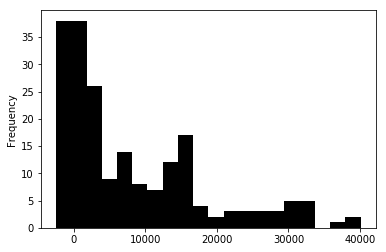

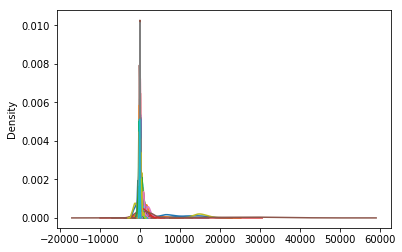

In [11]:
sample = sample.drop("cancer", axis=1)
sample.plot(kind="hist", legend=None, bins=20, color='k')
sample.plot(kind="kde", legend=None);

Depending on the random sample and the histogram-bin-kung-fu, the data usually has a long skinny tail to the right. This KDE plot shows the distribution of indivudal features, but it's not very helpful here. This will change after standardizing the data. 

### Distribution of the random sample after standardizing
---


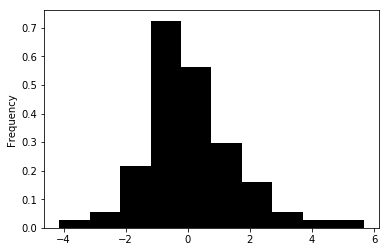

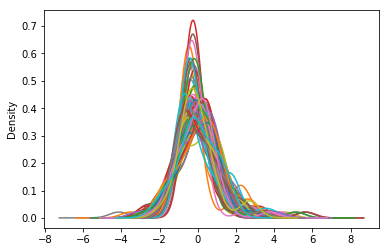

In [12]:
sample_scaled = pd.DataFrame(preprocessing.scale(sample))
sample_scaled.plot(kind="hist", normed=True, legend=None, bins=10, color='k')
sample_scaled.plot(kind="kde", legend=None);

There's quite a difference after standardizing the features. The KDE plot is much more useful in showing the individual distributions too. This is the result of subtracting the mean. Subtracting the mean from each feature centers them on zero. Neat!

# Process the full set
---




In [13]:
# StandardScaler to remove mean and scale to unit variance
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler().fit(train.iloc[:,2:])
scaled_train = scaler.transform(train.iloc[:,2:])
scaled_test = scaler.transform(test.iloc[:,2:])

x_train = train.iloc[:,2:]
y_train = train.iloc[:,1]
x_test = test.iloc[:,2:]
y_test = test.iloc[:,1]


# Classifiers
---

In [15]:
# Grid Search for tuning parameters
from sklearn.model_selection import GridSearchCV
# RandomizedSearch for tuning (possibly faster than GridSearch)
from sklearn.model_selection import RandomizedSearchCV
# Bayessian optimization supposedly faster than GridSearch
from bayes_opt import BayesianOptimization

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Helper functions

In [16]:
# CHERCHEZ FOR PARAMETERS
def cherchez(estimator, param_grid, search):
    """
    This is a helper function for tuning hyperparameters using teh two search methods.
    Methods must be GridSearchCV or RandomizedSearchCV.
    Inputs:
        estimator: Logistic regression, SVM, KNN, etc
        param_grid: Range of parameters to search
        search: Grid search or Randomized search
    Output:
        Returns the estimator instance, clf
    
    """   
    try:
        if search == "grid":
            clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=10, 
                verbose=0,
                return_train_score=True
            )
        elif search == "random":           
            clf = RandomizedSearchCV(
                estimator=estimator,
                param_distributions=param_grid,
                n_iter=10,
                n_jobs=-1,
                cv=10,
                verbose=0,
                random_state=1,
                return_train_score=True
            )
    except:
        print('Search argument has to be "grid" or "random"')
        sys.exit(0)
        
    # Fit the model
    clf.fit(X=scaled_train, y=y_train)
    
    return clf   

In [17]:
# Function for plotting the confusion matrices
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    """
    Plots the confusion matrix. Modified verison from 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    Inputs: 
        cm: confusion matrix
        title: Title of plot
    """
    classes=["AML", "ALL"]    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.bone)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black")    

# Models being tested
1. Logisitc Regresison
  - Using Grid search and Randomized search for tuning hyperparameters
2. C-Support Vector Classification (SVM)
  - Using Grid search and Randomized search for tuning hyperparameters
3. K-Nearest Neighbors Classifier
  - Using Grid search and Randomized search for tuning hyperparameters
4. Decision Tree Classifier
  - Using only Grid search

**Grid search results**
Best training accuracy:	 0.605263157895
Test accuracy:	 0.558823529412
**Random search results**
Best training accuracy:	 0.710526315789
Test accuracy:	 0.529411764706


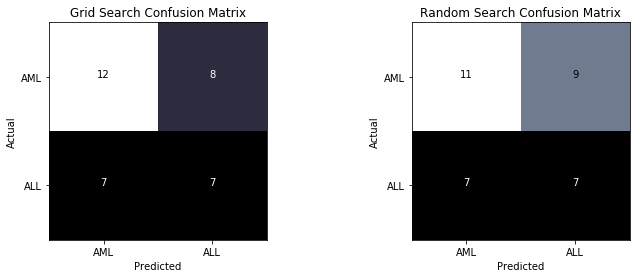

In [18]:
# Logistic Regression
# Paramaters
logreg_params = {} 
logreg_params["C"] =  [0.01, 0.1, 10, 100]
logreg_params["fit_intercept"] =  [True, False]
logreg_params["warm_start"] = [True,False]
logreg_params["random_state"] = [1]

lr_dist = {}
lr_dist["C"] = scipy.stats.expon(scale=.01)
lr_dist["fit_intercept"] =  [True, False]
lr_dist["warm_start"] = [True,False]
lr_dist["random_state"] = [1]

logregression_grid = cherchez(LogisticRegression(), logreg_params, search="grid")
acc = accuracy_score(y_true=y_test, y_pred=logregression_grid.predict(scaled_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=logregression_grid.predict(scaled_test))
print("**Grid search results**")
print("Best training accuracy:\t", logregression_grid.best_score_)
print("Test accuracy:\t", acc)

logregression_random = cherchez(LogisticRegression(), lr_dist, search="random")
acc = accuracy_score(y_true=y_test, y_pred=logregression_random.predict(scaled_test))
cfmatrix_rand = confusion_matrix(y_true=y_test, y_pred=logregression_random.predict(scaled_test))
print("**Random search results**")
print("Best training accuracy:\t", logregression_random.best_score_)
print("Test accuracy:\t", acc)

plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title="Random Search Confusion Matrix")
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title="Grid Search Confusion Matrix")

Discussion:<br>
In this case, Logistic Regression wasn't very good at classifying between AML and ALL. In both Grid and Random searches, the differences between the training and test scores show that the model is overfitting to the training data. In fact, the random search results actually overfit more than the grid search which is not what I expected.  Neither search type improved actual prediction results. Comparing the accuracy in confusion matrices the true positives (top left and bottm right corners) are almost the same for each type of search.

Conclusion: <br>
A randomized parameter search resulted in higher variance. Possible caveats are that the dataset is rather small and I really haven't tried to choose proper parameters to tune so there may be room for a *little* improvement. 
<br><br>

**Grid search results**
Best training accuracy:	 0.710526315789
Test accuracy:	 0.588235294118
**Random search results**
Best training accuracy:	 0.710526315789
Test accuracy:	 0.588235294118


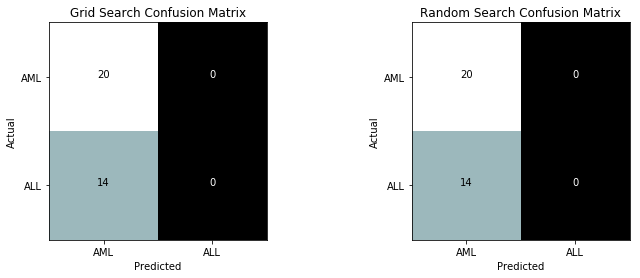

In [19]:
# SVM
svm_param = {
    "C": [.01, .1, 1, 5, 10, 100],
    "gamma": [0, .01, .1, 1, 5, 10, 100],
    "kernel": ["rbf"],
    "random_state": [1]
}

svm_dist = {
    "C": scipy.stats.expon(scale=.01),
    "gamma": scipy.stats.expon(scale=.01),
    "kernel": ["rbf"],
    "random_state": [1]
}

svm_grid = cherchez(SVC(), svm_param, "grid")
acc = accuracy_score(y_true=y_test, y_pred=svm_grid.predict(scaled_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=svm_grid.predict(scaled_test))
print("**Grid search results**")
print("Best training accuracy:\t", svm_grid.best_score_)
print("Test accuracy:\t", acc)

svm_random = cherchez(SVC(), svm_dist, "random")
acc = accuracy_score(y_true=y_test, y_pred=svm_random.predict(scaled_test))
cfmatrix_rand = confusion_matrix(y_true=y_test, y_pred=svm_random.predict(scaled_test))
print("**Random search results**")
print("Best training accuracy:\t", svm_random.best_score_)
print("Test accuracy:\t", acc)

plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title="Random Search Confusion Matrix")
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title="Grid Search Confusion Matrix")

Discussion:<br>
Well, this example goes to show that if you just predict that every patient has AML, you'll be correct more often than wrong. The model predicted that all 34 patients in the test data had AML and was absolutely right for 20 of them but absolutely wrong for the other 14 patients. 

Conclusion<br>
I wouldn't use this particular model to classify cancer patients.
<br><br>

**Grid search results**
Best training accuracy:	 0.894736842105
Test accuracy:	 0.558823529412
**Random search results**
Best training accuracy:	 0.868421052632
Test accuracy:	 0.558823529412


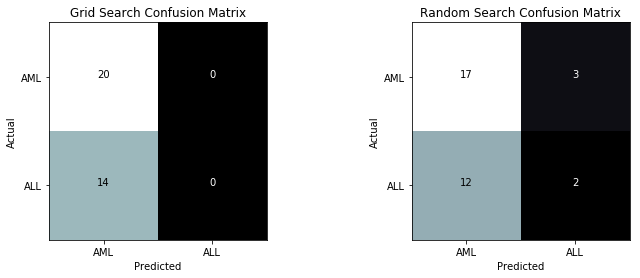

In [20]:
# KNN
knn_param = {
    "n_neighbors": [i for i in range(1,30,5)],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1, 10, 30],
    "p": [1,2]
}

knn_dist = {
    "n_neighbors": scipy.stats.randint(1,33),
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": scipy.stats.randint(1,1000),
    "p": [1,2]
}

knn_grid = cherchez(KNeighborsClassifier(), knn_param, "grid")
acc = accuracy_score(y_true=y_test, y_pred=knn_grid.predict(scaled_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=svm_grid.predict(scaled_test))
print("**Grid search results**")
print("Best training accuracy:\t", knn_grid.best_score_)
print("Test accuracy:\t", acc)

knn_random = cherchez(KNeighborsClassifier(), knn_dist, "random")
acc = accuracy_score(y_true=y_test, y_pred=knn_random.predict(scaled_test))
cfmatrix_rand = confusion_matrix(y_true=y_test, y_pred=knn_random.predict(scaled_test))
print("**Random search results**")
print("Best training accuracy:\t", knn_random.best_score_)
print("Test accuracy:\t", acc)

plt.subplots(1,2)
plt.subplots_adjust(left=-0.5, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plot_confusion_matrix(cfmatrix_rand, title="Random Search Confusion Matrix")
plt.subplot(121)
plot_confusion_matrix(cfmatrix_grid, title="Grid Search Confusion Matrix")

Discusison:<br>
As with the other models, an automated search for hyperparameters with KNN just overfits the training data and doesn't generalize to the test data. The one difference here is that a randomized search produced a model which predicted that at least some of the patients had ALL rather than predicting that all patients have AML.

Conclusion:<br>
My main problem is that the GridSearch and RandomSearch use the model that fits the training data the best without taking into account how well it will generalizes to the test data. 

**Grid search results**
Best training accuracy:	 0.973684210526
Test accuracy:	 0.617647058824


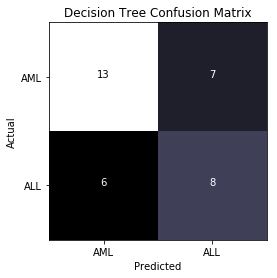

In [21]:
# Decision tree classifier
dtc_param = {
    "max_depth": [None],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "min_weight_fraction_leaf": [0.],
    "max_features": [None],
    "random_state": [4],
    "max_leaf_nodes": [None], # None = infinity or int
    "presort": [True, False]
}


dtc_grid = cherchez(DecisionTreeClassifier(), dtc_param, "grid")
acc = accuracy_score(y_true=y_test, y_pred=dtc_grid.predict(scaled_test))
cfmatrix_grid = confusion_matrix(y_true=y_test, y_pred=dtc_grid.predict(scaled_test))
print("**Grid search results**")
print("Best training accuracy:\t", dtc_grid.best_score_)
print("Test accuracy:\t", acc)

plot_confusion_matrix(cfmatrix_grid, title="Decision Tree Confusion Matrix")

Discussion:<br>
This model accurately predicted more ALL patients than any of the other models and had the lowest false positive rate, but frankly that's just painting it in a positive light and I'm not even bothering to calculate it. The model still has poor accuracy overall, doesn't generalize to the test data, and has a huge variance problem

Conclusion:<br>
This experiment makes a good case for splitting your data into train, validation, and test sets. It would be nice if GridSearch and RandomSearch could refit the best predictors that minimize the variance between the accuracy of train and validation sets. As it is, overfitting the training data has been a problem for each of these models. It's possible that I could investigate which parameters would be better to tune and it's possible that there isn't enough data, and it's also possible that this isn't a good classification problem. Maybe I need to approach this as a clustering problem. What do you think?

# Sources:

Golub et al: https://www.ncbi.nlm.nih.gov/pubmed/10521349

Bayesian optimization: https://arxiv.org/pdf/1012.2599v1.pdf
